# 3.2.

C:\Users\NAM\AppData\Local\Temp\ipykernel_5524\1505575623.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=mu, cov=Sigma, size=2000)


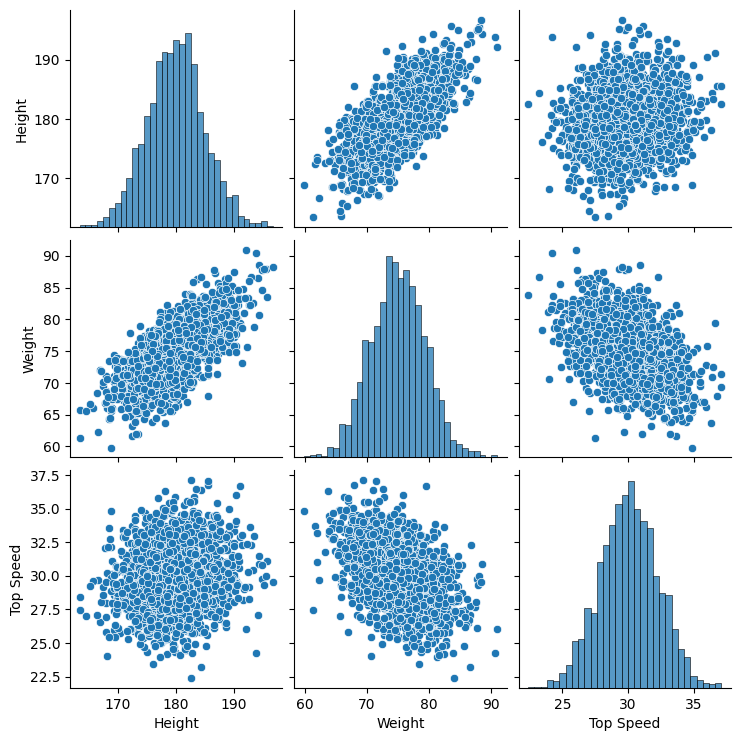

In [4]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(232)

mu = np.array([180,75,30]) # mean vector
Sigma = np.array([[25,15,2],
                  [15,20,-5],
                  [-2,-5,4]]) # covariance matrix 

X = np.random.multivariate_normal(mean=mu, cov=Sigma, size=2000)

df_X = pd.DataFrame(X, columns=["Height", "Weight", "Top Speed"])
sns.pairplot(df_X)

# 3.3.

In [23]:
distances = np.zeros(df_X.shape[0])

for i in range(df_X.shape[0]):
    x = df_X.iloc[i].to_numpy()
    x_centered = x - mu
    d2 = x_centered @ np.linalg.inv(Sigma) @ x_centered.T
    distances[i] = np.sqrt(d2)

df_X['Mahalanobis'] = distances # add column to df for displaying
top3_dist = np.sort(distances)[-3:]
top3_idx = np.argsort(distances)[-3:]
top3_rows = df_X.iloc[top3_idx]

top3_rows

,Height,Weight,Top Speed,Mahalanobis
1990,168.243274,70.592487,24.005939,4.097651
995,191.100243,79.407411,36.639735,4.514353
1110,163.471352,61.296076,27.464257,4.560830
